In [3]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)  

In [65]:
import os
import collections

songs = collections.defaultdict(set)
song_names = dict()
for f in sorted(os.listdir('songs')):
    if f[0] == '.':
        continue
    
    for i, l in enumerate(open('songs/' + f, 'r').readlines()):
        if i == 0:
            song_names[f.split(".")[0]] = l.strip()
        # Ignore song name
        if i < 2:
            continue
        
        arr = l.strip().split(" ")
        
        for a in arr:
            if a == '':
                continue
            if a not in model.vocab:
                continue
            songs[f.split(".")[0]].add(a)

print(songs)
song_years = sorted(list(songs.keys()))
song_years

defaultdict(<class 'set'>, {'1962': {'Come', 'you', 'island', 'sets', 'Sunny', 'the', 'our', 'for', 'join', 'oh', 'bloom', 'merry', 'Join', 'along', 'Pretty', 'song', 'in', 'Blend', 'flowers'}, '1967': {"you'll", 'Quay', 'sunrise', 'turning', 'us', 'unforgettable', 'light', 'striving', 'other', 'you', 'happiness', 'take', 'around', 'In', 'Because', 'hundred', 'Raffles', 'the', 'bus', 'buildings', 'for', 'into', 'Collyer', 'For', 'people', 'Place', 'an', "You'll", "there's", 'way', 'could', 'Esplanade', 'everyone', 'are', 'Singapore', 'on', 'sky', 'And', 'I', 'all', 'big', 'find', 'climbing', 'see', "it's", 'trip', 'You', 'in', 'faraway', "Let's", 'like', 'sight', 'city', 'town', 'who', 'little', 'hearts', 'To', 'Their', 'The', 'go', 'wide', 'down', 'darkness'}, '1969': {'white', 'truth', 'new', 'love', 'blood', 'happy', 'the', 'lamp', 'out', 'guide', 'our', 'yet', 'for', 'we', 'Each', 'as', 'stormy', 'moon', 'five', 'Youthful', 'are', 'free', 'tranquil', 'all', 'flag', 'is', 'pure', 's

['1962',
 '1967',
 '1969',
 '1984',
 '1986',
 '1987',
 '1990',
 '1991',
 '1997',
 '1999',
 '1999-2',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2007-2',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2015',
 '2016',
 '2017']

In [100]:
import numpy as np
import copy

centroids = np.zeros((len(song_years), 300))

for i in range(len(song_years)):
    l = list(songs[song_years[i]])
    centroids[i] = copy.copy(model[l[0]])
    
    for w in range(1, len(l)):
        centroids[i] += model[l[w]]
    
    #centroids[i] /= len(l)

In [101]:
dist = np.zeros((len(songs.keys()), len(songs.keys())))

In [102]:
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        dist[i, j] = np.linalg.norm(centroids[i] - centroids[j])

In [103]:
dist

array([[ 0.        , 42.81775139, 25.68254472, 45.35793312, 44.11208309,
        65.53252145, 36.4454019 , 63.44267586, 24.38986124, 43.54195464,
        59.05271877, 53.18048669, 76.10454971, 80.85531401, 37.39337167,
        65.55039083, 58.25738642, 35.56568183, 76.57052055, 34.37801308,
        60.47463136, 84.65393363, 58.23622205, 55.7064247 , 61.86866693,
        86.91866936, 68.59641076, 86.02410835, 32.18125789],
       [42.81775139,  0.        , 33.25006024, 31.08172601, 29.11059355,
        41.65273257, 27.72723421, 39.9335702 , 30.25015375, 27.6879826 ,
        38.00914714, 32.12826965, 45.0807139 , 53.1239474 , 29.67088216,
        36.48340954, 33.98038149, 29.84181284, 49.05053594, 25.94188528,
        35.3721409 , 54.40259345, 34.03994993, 33.54363553, 36.82132088,
        57.61248275, 41.35271305, 57.48255222, 29.29158012],
       [25.68254472, 33.25006024,  0.        , 37.78285351, 34.24918287,
        52.79298032, 27.75819149, 52.22454304, 19.44239056, 32.95299745,
  

In [104]:
out = open('dist.txt', 'w')
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        out.write(str(dist[i, j]).ljust(20) + ' ')
    out.write('\n')
out.close()

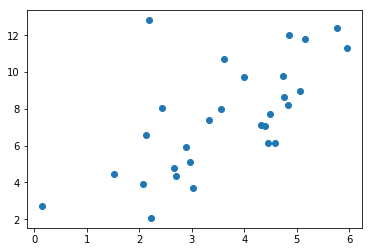

In [105]:
import matplotlib.pyplot as plt

plt.plot(centroids[:,2], centroids[:,3], 'o')
plt.show()

In [109]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(centroids)
labels = gmm.predict(centroids)

In [110]:
for s, l in sorted(zip(song_years, labels), key = lambda x: x[1]):
    print(s.ljust(8), song_names[s].ljust(50),l)

1991     It's the Little Things                             0
2001     Where I Belong                                     0
2004     Home                                               0
2008     Shine For Singapore                                0
2011     In A Heartbeat                                     0
2012     Love At First Light                                0
1962     Singapura, Sunny Island                            1
1967     Singapore Town                                     1
1969     Five Stars Arising                                 1
1984     Stand Up for Singapore                             1
1986     Count On Me Singapore                              1
1990     One People, One Nation, One Singapore              1
1997     Future In My Dreams                                1
1999     Moments of Magic                                   1
2003     One United People                                  1
2006     My Island Home                                     1
2007-2  

In [79]:
from joblib import dump, load
#dump(gmm, 'gmm-5cluster-best.joblib')

/home/ashiswin/Documents/National-Day-Song-Analysis/.env/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 12] Cannot allocate memory.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


['gmm-5cluster-best.joblib']

In [98]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(centroids)
kmeans.labels_

array([1, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 2, 3, 3, 0,
       0, 0, 0, 3, 0, 3, 3], dtype=int32)

In [99]:
for s, l in sorted(zip(song_years, kmeans.labels_), key = lambda x: x[1]):
    print(s.ljust(8), song_names[s].ljust(50),l)

1969     Five Stars Arising                                 0
1987     We Are Singapore                                   0
1997     Future In My Dreams                                0
1999     Moments of Magic                                   0
1999-2   Together                                           0
2000     Shine On Me                                        0
2003     One United People                                  0
2005     Reach Out For The Skies                            0
2009     What Do You See?                                   0
2010     Song for Singapore                                 0
2011     In A Heartbeat                                     0
2012     Love At First Light                                0
2015     Our Singapore                                      0
1962     Singapura, Sunny Island                            1
2007     There's No Place I'd Rather Be                     2
1967     Singapore Town                                     3
1984    